In [1]:
import dinkum
import random
import pandas as pd
from dinkum.vfg import Gene, Receptor
from dinkum.vfn import Tissue

from dinkum.display import MultiTissuePanel, tc_record_activity

initializing: dinkum v0.3.3
start=1 stop=10


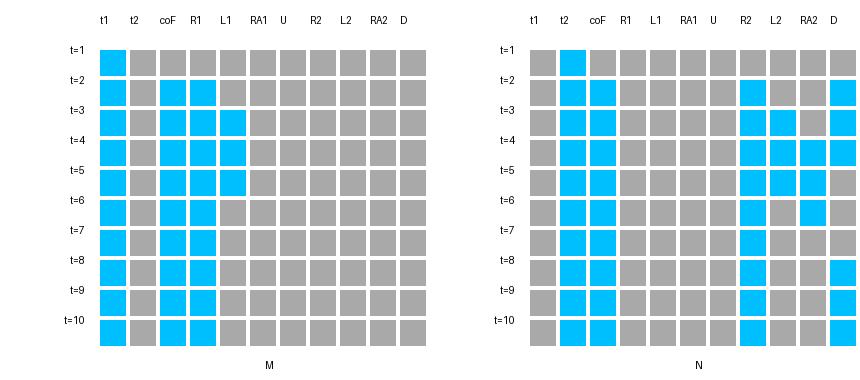

In [5]:
dinkum.reset()

# create two tissues to demonstrate the toggle-repressed switch                                                              
m = Tissue(name='M')
n = Tissue(name='N')

# The two tissues have their own lineage-identity programs
t1 = Gene(name = "t1")
t2 = Gene(name = "t2")
t1.is_present(where = m, start = 1)
t2.is_present(where = n, start = 1)

# Generate the TF co-factor that uses the two pathways
# It is present in either tissue
coF = Gene(name = "coF")
coF.activated_or(sources = [t1, t2], delay = 1)

# Generate two signaling pathways that are tissue-specific
r1 = Gene(name = "R1")
r2 = Gene(name = "R2")
r1.activated_by(source = t1, delay = 1)
r2.activated_by(source = t2, delay = 1)

# The two receptors are activated by their respective ligands and transform into their active state
l1 = Gene(name = "L1")
l2 = Gene(name = "L2")
ra1 = Gene(name = "RA1")
ra2 = Gene(name = "RA2")
ra1.activated_by_and(sources=[r1, l1], delay = 1)
ra2.activated_by_and(sources=[r2, l2], delay = 1)

# In tissue 1, active receptor 1 cooperates with coF to activate its target(s)
up = Gene(name = "U")
up.activated_by_and(sources = [ra1, coF, t1], delay = 1)

# In tissue 2, active receptor 2 cooperates with coF to activate its target(s)
down = Gene(name = "D")
down.and_not(activator = t2, repressor = ra2, delay = 1)

# Give the ligands at time step 4 for 3 steps
l1.is_present(where=m, start = 3, duration=3)
l2.is_present(where=n, start = 3, duration=3)

dinkum.run_and_display(stop=10, gene_names=["t1", "t2", "coF", "R1", "L1", "RA1", "U", "R2", "L2", "RA2", "D"])

In [3]:
help(dinkum)

Help on package dinkum:

NAME
    dinkum

PACKAGE CONTENTS
    display (package)
    observations
    vfg
    vfn

CLASSES
    builtins.Exception(builtins.BaseException)
        DinkumException
            DinkumObservationFailed
    builtins.object
        GeneActivity
        State
        Timecourse
    collections.UserDict(collections.abc.MutableMapping)
        States
    
    class DinkumException(builtins.Exception)
     |  Method resolution order:
     |      DinkumException
     |      builtins.Exception
     |      builtins.BaseException
     |      builtins.object
     |  
     |  Data descriptors defined here:
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)
     |  
     |  ----------------------------------------------------------------------
     |  Methods inherited from builtins.Exception:
     |  
     |  __init__(self, /, *args, **kwargs)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
   